<a href="https://colab.research.google.com/github/Siddhantdamre/HealthCare/blob/main/WorkingSinglePDFAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install torch torchvision torchaudio  # PyTorch
!pip install easyocr transformers pdf2image hdbscan pandas matplotlib seaborn scikit-learn
!apt-get install poppler-utils  # Required for pdf2image
!pip install torch transformers datasets
!pip install easyocr
!pip install torch torchvision torchaudio



  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
Using cached pdf2image-1.17.0-py3-none-any.whl (11 kB)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
  Using cached datasets-3.4.0-py3-none-any.whl.metadata (19 kB)
Using cached datasets-3.4.0-py3-none-any.whl (487 kB)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing o

Saving sample_medical_report.pdf to sample_medical_report (9).pdf
Uploaded File: sample_medical_report (9).pdf
Extracted Text: Medical Report
Patient Details
Name: John Doe
Age: 45
Gender: Male
Address: 123 Health St, MedCity, 45678
Symptoms & Diagnosis
Symptoms: Fever, cough, difficulty breathing.
Diagnosis: Pneumonia
Doctor's Notes: Patient shows signs of a bacterial lung infection. Prescribed antibiotics and bed rest.
Test Results
Blood Test: Elevated white blood cell count.
Chest X-ray: Infiltrates present in the lower left lung.
Conclusion: Suggests bacterial pneumonia.


Predicted Disease Class: 4179853


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


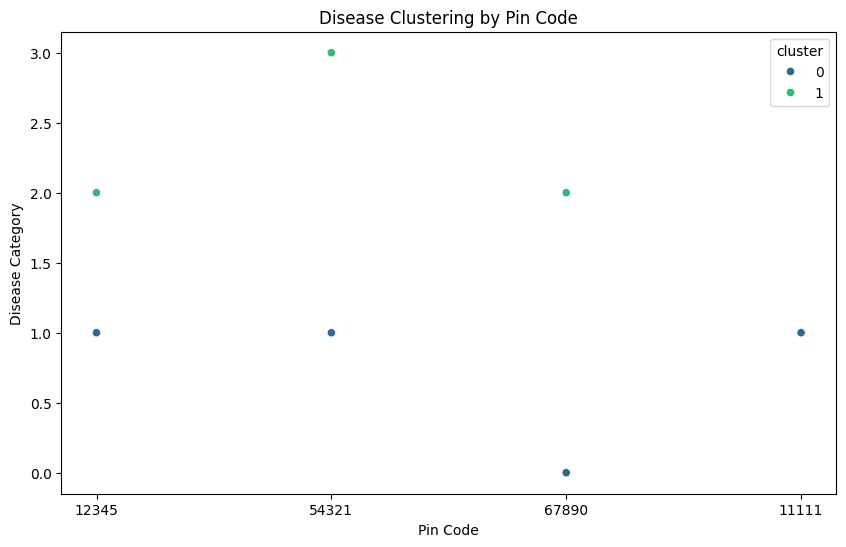

In [15]:
# Install required libraries
!apt-get install -y poppler-utils
!pip install easyocr transformers hdbscan pdf2image matplotlib seaborn pandas scikit-learn opencv-python-headless
!huggingface-cli login
# Use a pipeline as a high-level helper
from transformers import pipeline
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

pipe = pipeline("fill-mask", model="GerMedBERT/medbert-512")
# Import required libraries
import torch
import easyocr
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import os
from pdf2image import convert_from_path
from google.colab import files
from transformers import AutoTokenizer, AutoModelForSequenceClassification, logging
from sklearn.preprocessing import LabelEncoder
from getpass import getpass  # Secure token entry
!pip install pymupdf
import fitz

# Suppress unnecessary warnings
logging.set_verbosity_error()

# Step 1: Authenticate Hugging Face
hf_token = getpass("Enter your Hugging Face Token: ")  # Securely input the token
os.environ["HUGGINGFACE_HUB_TOKEN"] = hf_token

# Step 2: Upload a PDF file
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]  # Get filename
print("Uploaded File:", pdf_path)

# Step 3: Initialize OCR reader (use GPU if available)
reader = easyocr.Reader(["en"], gpu=torch.cuda.is_available())
def extract_text_with_pymupdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text") + "\n"
    return text

# Run OCR on uploaded PDF
def extract_text_with_pymupdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text") + "\n"
    return text

extracted_text = extract_text_with_pymupdf(pdf_path)
print("Extracted Text:", extracted_text[:500])
# Step 4: Load a medical BERT model (requires authentication)

tokenizer = AutoTokenizer.from_pretrained("GerMedBERT/medbert-512")
model = AutoModelForMaskedLM.from_pretrained("GerMedBERT/medbert-512")

# Set model to evaluation mode
model.eval()

def classify_medical_text(text):
    """Classify medical text using a BioBERT model."""
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits).item()
    return predicted_class

# Step 5: Classify the extracted text
predicted_class = classify_medical_text(extracted_text)
print("Predicted Disease Class:", predicted_class)

# Step 6: Sample patient records (simulated dataset)
data = {
    "pin_code": ["12345", "12345", "54321", "54321", "67890", "67890", "11111"],
    "extracted_disease": ["COVID-19", "Flu", "Pneumonia", "COVID-19", "Asthma", "Flu", "COVID-19"]
}
df = pd.DataFrame(data)

# Encode disease names into numerical values for clustering
label_encoder = LabelEncoder()
df["extracted_disease_encoded"] = label_encoder.fit_transform(df["extracted_disease"])

# Step 7: Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
df["cluster"] = clusterer.fit_predict(df[["extracted_disease_encoded"]])

# Step 8: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pin_code", y="extracted_disease_encoded", hue="cluster", palette="viridis")
plt.title("Disease Clustering by Pin Code")
plt.xlabel("Pin Code")
plt.ylabel("Disease Category")
plt.show()
